# Pyber

![Ride](images/Ride.png)

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

In [446]:
#dependencies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load files
city_df = pd.read_csv('raw_data/city_data.csv')
ride_df = pd.read_csv('raw_data/ride_data.csv').sort_values('ride_id')

In [447]:
#list of cities has duplicates
#because of that the merge table would have doubled rides
city_df[city_df.duplicated(subset='city', keep=False).values]

,city,driver_count,type
84,Port James,15,Suburban
100,Port James,3,Suburban


In [448]:
#drop duplicates
city_df = city_df.drop_duplicates(subset='city')

In [449]:
#check if cities are equally spelled in both df
np.array_equal(np.sort(city_df['city'].unique()), np.sort(ride_df['city'].unique()))

True

In [452]:
#combine data over city name
data_df = pd.merge(ride_df, city_df, on='city')

In [453]:
#prepare the summary df for the plot
by_city = data_df.groupby(['city','type']).agg \
                    ( \
                     {'ride_id':'count', \
                      'fare': 'mean', \
                      'driver_count':lambda x: sum(x) / x.count()
                     })
by_city = by_city.reset_index()
by_city.columns = ['city','Type','ride_count', 'average_fare', 'driver_count']

Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

<IPython.core.display.Javascript object>


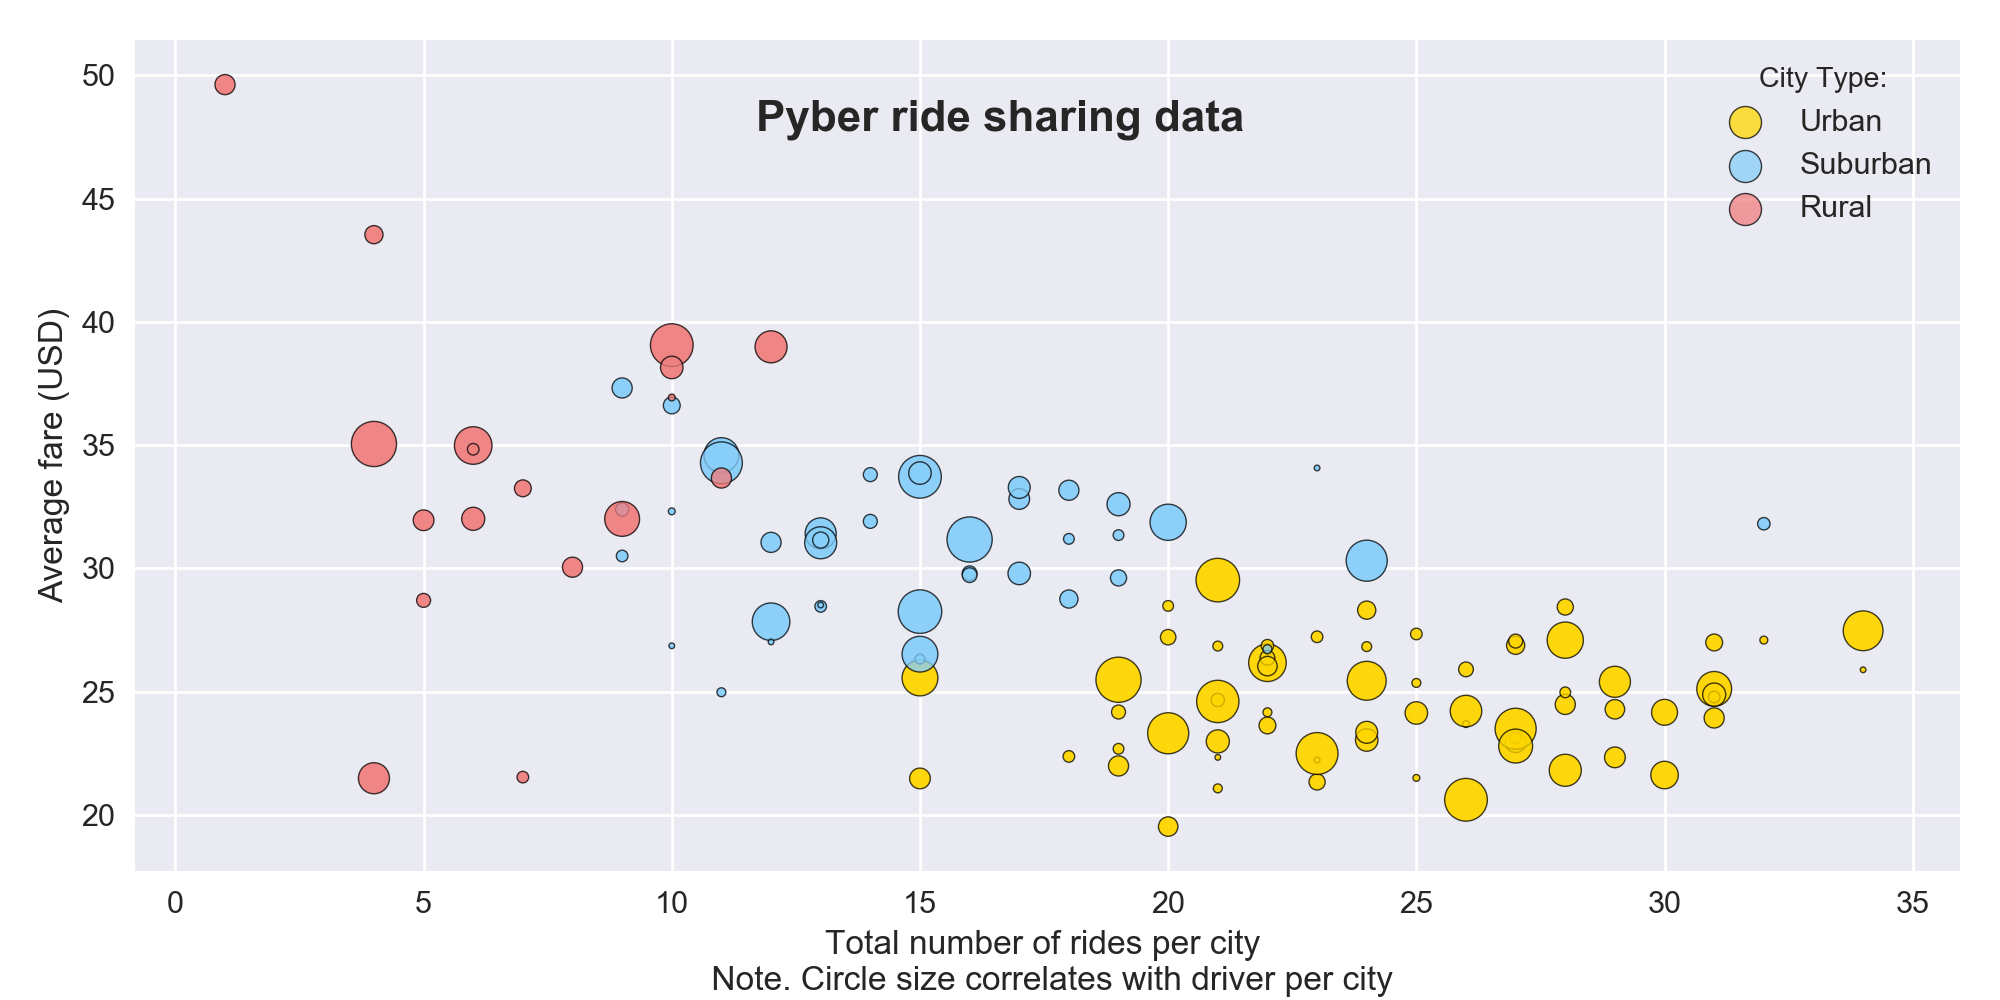

In [455]:
#set seaborn styles
sns.set_context("notebook", font_scale=1.1)
sns.set_style("darkgrid")
sns.color_palette(palette='colorblind')

#use corporate colors for the plot
colors = ['gold', 'lightskyblue', 'lightcoral']

#calculate marker size
marker_size = by_city['driver_count']**1.3

#create a seaborn figure
g = sns.lmplot('ride_count', 'average_fare', data=by_city, hue='Type', \
               legend_out=False, fit_reg=False, scatter_kws={'s':marker_size}, \
               size=5, aspect=2, legend=True, palette=colors)

#add edge to the markers and show legend again
g = g.map(plt.scatter, 'ride_count', 'average_fare', s=marker_size, alpha=0.75, edgecolor="black", \
         linewidths=0.5).add_legend(title='City Type:')


#add titles
g.fig.suptitle('Pyber ride sharing data', y=0.9, weight='bold')
plt.xlabel('Total number of rides per city \n Note. Circle size correlates with driver per city')
plt.ylabel('Average fare (USD)')

#show figure
plt.show()

# Bubble chart
![Pies](images/bubble.png)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

In [456]:
#prepare the summary df for the plot
by_type = data_df.groupby(['type']).agg \
                    ( \
                     {'ride_id':'count', \
                      'fare': 'sum', \
                      'driver_count':'sum'
                     })
by_type = by_type.reset_index()
by_type.columns = ['City Type','Total Rides','Total Fares', 'Total Drivers']

<IPython.core.display.Javascript object>


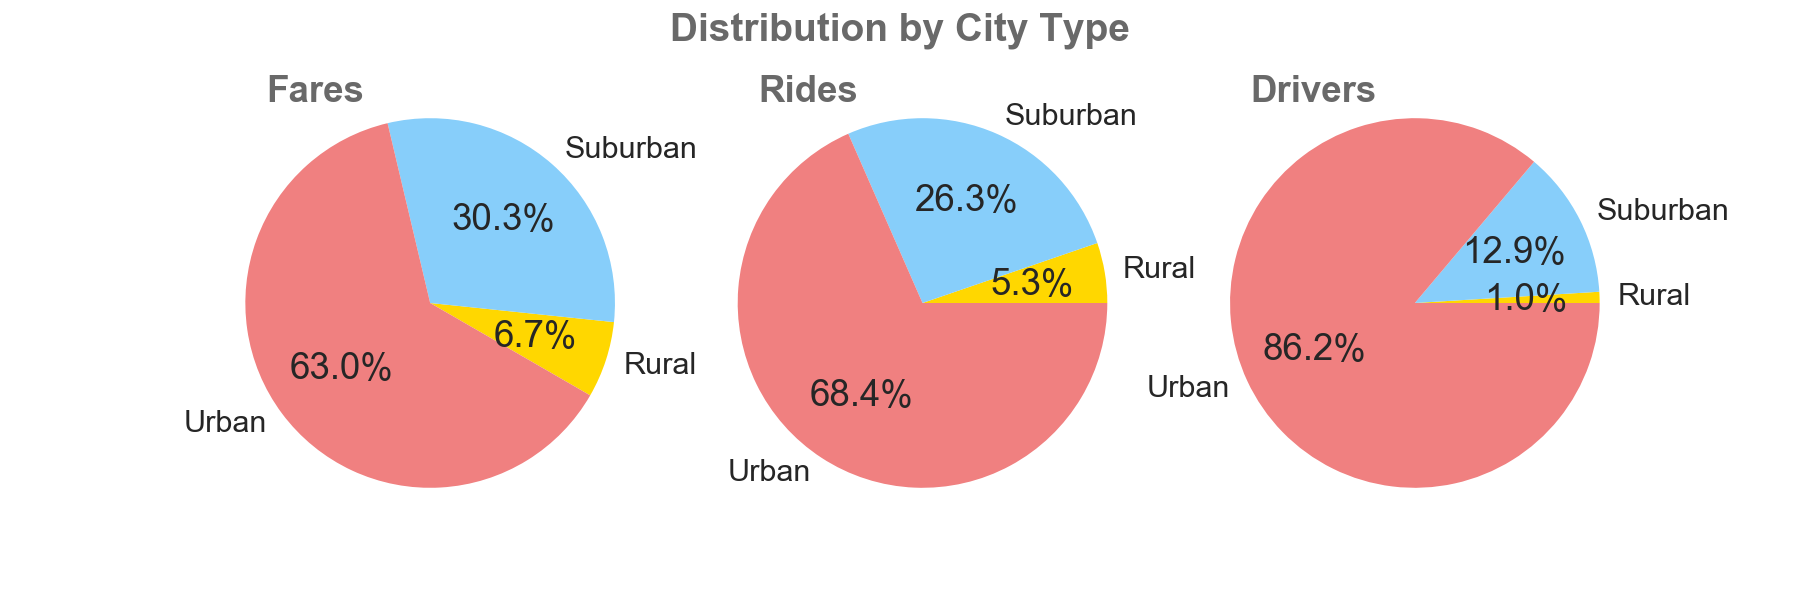

In [457]:
#initialize figure with three axes
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(9,3))

#use corporate colors for the plots
colors = ['gold', 'lightskyblue', 'lightcoral']

#draw pie charts
ax1.set_aspect('equal')
ax1.pie(by_type['Total Fares'], labels=by_type['City Type'], autopct="%1.1f%%", colors=colors, startangle=330)
ax2.pie(by_type['Total Rides'], labels=by_type['City Type'], autopct="%1.1f%%", colors=colors, startangle=0)
ax3.pie(by_type['Total Drivers'], labels=by_type['City Type'], autopct="%1.1f%%", colors=colors, startangle=0)

#set titles
f.suptitle('Distribution by City Type', fontsize=14, fontweight='bold', color='dimgray')
ax1.set_title('Fares', loc ='left', x=0.1, y=0.9, weight='bold', color='dimgray')
ax2.set_title('Rides', loc ='left', x=0.1, y=0.9, weight='bold', color='dimgray')
ax3.set_title('Drivers', loc ='left', x=0.1, y=0.9, weight='bold', color='dimgray')

plt.show()

# Pie charts
![Pies](images/pies.png)

# Observations

* Average fares in Urban areas are lower than in Rural ones
* Total numbers of drivers in each city (not in category) seems to be equally spread across from Urban to Rural areas.  There should be more drivers in Urban areas.  Why is that the case?  Is the penetration of Pyber in Rural areas better than in Urban ones?
* Most money are in Urban areas. 